In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
# Solo utilizaremos tres columnas

df = total_data[["MedInc", "Latitude", "Longitude"]]

df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [3]:
# Dividimos en train y test

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


MODELO K-MEANS

In [4]:
from sklearn.cluster import KMeans

# Especificar el número de clusters (6 en este caso)
# Inicializar el modelo K-Means
modelo = KMeans(n_clusters = 6, random_state = 42)

# Entrenamiento del Modelo con Datos de Entrenamiento:
modelo.fit(X_train)

# Mostrar el conjunto de datos con la nueva columna 'cluster'
print(X_train.head())

c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


       MedInc  Latitude  Longitude
14196  3.2596     32.71    -117.03
8267   3.8125     33.77    -118.16
17445  4.1563     34.66    -120.48
14265  1.9425     32.69    -117.11
2271   3.5542     36.78    -119.80


In [5]:
# Obtención de Etiquetas de Clúster para Datos de Entrenamiento
y_train = list(modelo.labels_)

# Estas etiquetas representan a qué clúster pertenece cada punto de datos.

In [6]:
# Incorporación de las Etiquetas al Conjunto de Entrenamiento
X_train["cluster"] = y_train

X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,2
8267,3.8125,33.77,-118.16,2
17445,4.1563,34.66,-120.48,0
14265,1.9425,32.69,-117.11,2
2271,3.5542,36.78,-119.80,0


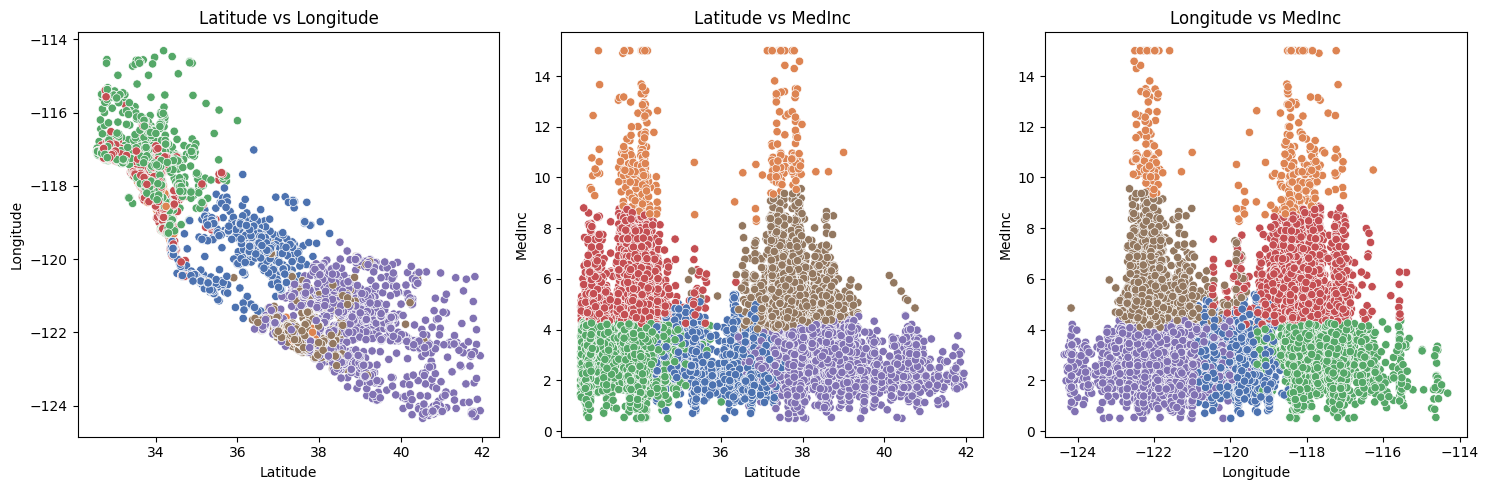

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear subgráficos
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de dispersión para Latitude vs Longitude
sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", palette="deep", legend=False)
axis[0].set_title("Latitude vs Longitude")

# Gráfico de dispersión para Latitude vs MedInc
sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", palette="deep", legend=False)
axis[1].set_title("Latitude vs MedInc")

# Gráfico de dispersión para Longitude vs MedInc
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", palette="deep", legend=False)
axis[2].set_title("Longitude vs MedInc")

plt.tight_layout()
plt.show()

Latitude vs Longitude:

Los puntos parece ser que se agrupan en zonas definidas, indicando que hay regiones geográficas con características similares, por lo que
comparten similitudes en terminos de latitud y longitud.

Latitude vs MedInc (Ingreso Mediano):

Los puntos de diferentes colores (clusteres) estan dispersados uniformemente a lo largo de las latitudes por lo que su significado hacia el ingreso mediano no habria una relacion clara.

Longitude vs MedInc (Ingreso Mediano):

Lo mismo pasa con la longitud en relacion al ingreso mediano, no existe una relacion muy clara al igual que la grafica de la latitud.

In [8]:
# Predecir los clústeres para el conjunto de prueba
y_test = list(modelo.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,0
3024,2.5313,35.14,-119.46,0
15663,3.4801,37.80,-122.44,4
20484,5.7376,34.28,-118.72,3
9814,3.7250,36.62,-121.93,4


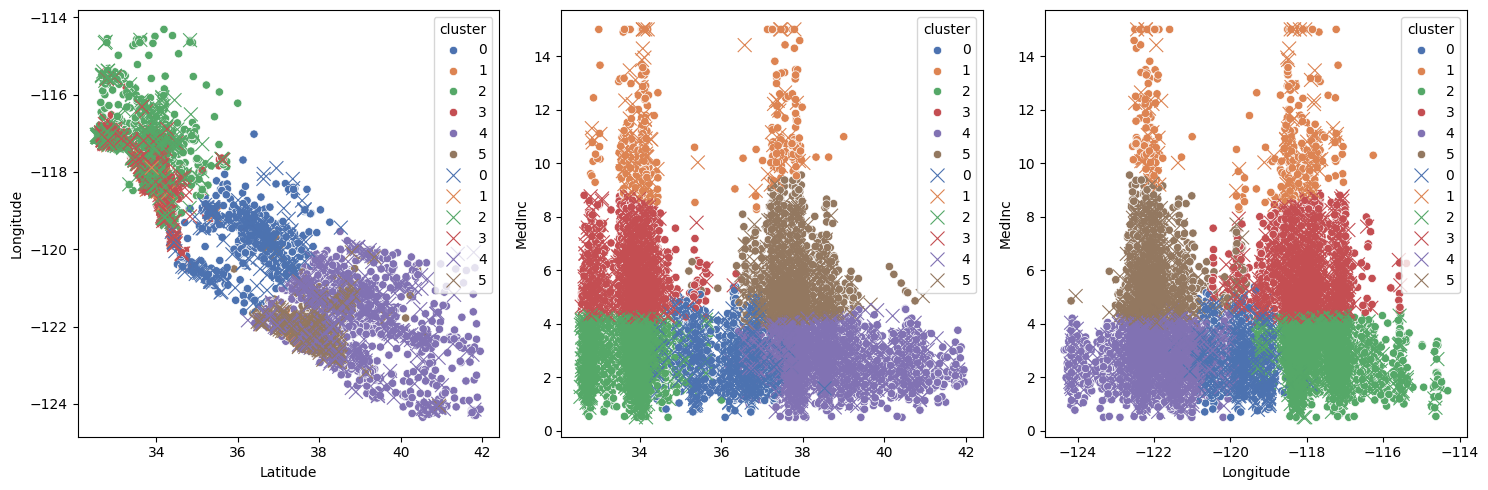

In [9]:
# Graficar los datos de entrenamiento y prueba juntos con predicciones
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Restaurar la columna 'cluster' en el conjunto de entrenamiento
X_train['cluster'] = y_train

# Gráfico 1: Distribución en el plano Latitude vs Longitude
sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", palette="deep")
sns.scatterplot(ax=axis[0], data=X_test, x="Latitude", y="Longitude", hue="cluster", palette="deep", marker='x', s=100)

# Gráfico 2: Distribución en el plano Latitude vs MedInc
sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", palette="deep")
sns.scatterplot(ax=axis[1], data=X_test, x="Latitude", y="MedInc", hue="cluster", palette="deep", marker='x', s=100)

# Gráfico 3: Distribución en el plano Longitude vs MedInc
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", palette="deep")
sns.scatterplot(ax=axis[2], data=X_test, x="Longitude", y="MedInc", hue="cluster", palette="deep", marker='x', s=100)

plt.tight_layout()
plt.show()                 # Este código agrega los puntos de predicción al gráfico anterior marcándolos con una "x"

ENTRENAMIENTO DE UN MODELO SUPERVISADO

In [10]:
# Predicciones en el conjunto de prueba
# Paso 1: Asegurarse de que 'cluster' está en los conjuntos de entrenamiento y prueba
X_train['cluster'] = y_train
X_test['cluster'] = y_test

In [11]:
# Paso 2: Dividir los datos en características (X) y variable objetivo (y)
X_train_features = X_train.drop('cluster', axis=1)
y_train_cluster = X_train['cluster']

X_test_features = X_test.drop('cluster', axis=1)
y_test_cluster = X_test['cluster']

In [12]:
from sklearn.linear_model import LogisticRegression

# Paso 3: Seleccionar y entrenar un modelo de clasificación supervisado (Regresión Logística)
model_supervised = LogisticRegression(random_state=42)
model_supervised.fit(X_train_features, y_train_cluster)

c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [13]:
# Paso 4: Evaluar el rendimiento del modelo
y_pred_cluster = model_supervised.predict(X_test_features)

y_pred_cluster

array([0, 2, 4, ..., 5, 4, 2])

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Métricas de evaluación
accuracy_cluster = accuracy_score(y_test_cluster, y_pred_cluster)
conf_matrix_cluster = confusion_matrix(y_test_cluster, y_pred_cluster)
classification_rep_cluster = classification_report(y_test_cluster, y_pred_cluster)

print(f'Accuracy (Cluster): {accuracy_cluster:.2f}')
print(f'Confusion Matrix (Cluster):\n{conf_matrix_cluster}')
print(f'Classification Report (Cluster):\n{classification_rep_cluster}')

Accuracy (Cluster): 0.92
Confusion Matrix (Cluster):
[[ 156    0   40    8  118   16]
 [   0   83    0    1    0    5]
 [  20    0 1460    7    0    1]
 [   0    2   15  715    0    4]
 [  43    0    0    0  910    4]
 [   6    0    0    0   24  490]]
Classification Report (Cluster):
              precision    recall  f1-score   support

           0       0.69      0.46      0.55       338
           1       0.98      0.93      0.95        89
           2       0.96      0.98      0.97      1488
           3       0.98      0.97      0.97       736
           4       0.87      0.95      0.91       957
           5       0.94      0.94      0.94       520

    accuracy                           0.92      4128
   macro avg       0.90      0.87      0.88      4128
weighted avg       0.92      0.92      0.92      4128



In [15]:
import os
from pickle import dump

# Crear el directorio si no existe
os.makedirs("/models/", exist_ok=True)

# Guardar los modelos
dump(modelo, open("/models/k-means_default_42.sav", "wb"))
dump(model_supervised, open("/models/decision_tree_classifier_default_42.sav", "wb"))